C:\Users\Cameron\AppData\Local\Temp\ipykernel_1632\3181224111.py:31: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  polygon = patches.Polygon(vertices, closed=True, color=color, edgecolor='black')


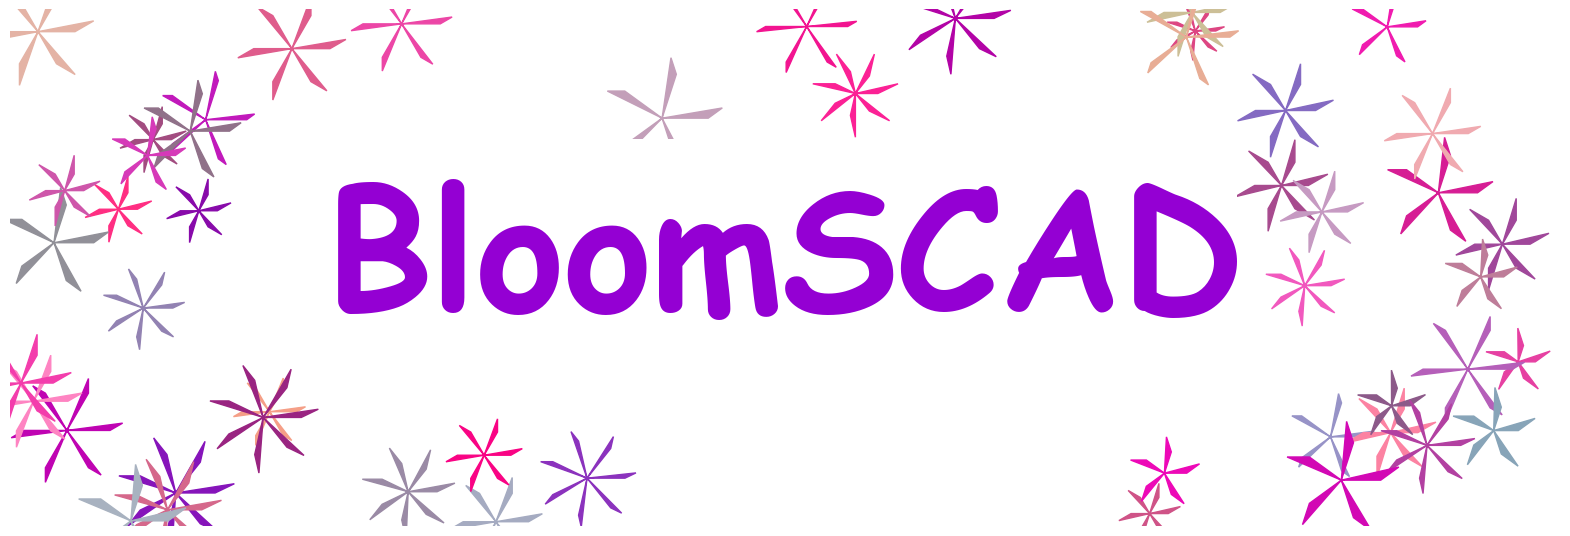

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib.colors as mcolors

def create_petal(center, radius, angle, offset, petal_length):
    """Generate the vertices of a single petal."""
    x_base = center[0] + radius * np.cos(angle)
    y_base = center[1] + radius * np.sin(angle)
    x_tip = x_base + petal_length * np.cos(angle + offset)
    y_tip = y_base + petal_length * np.sin(angle + offset)
    return [(center[0], center[1]), (x_base, y_base), (x_tip, y_tip)]

def create_flower(center, size, petal_count, petal_length):
    """Generate the vertices for a full flower with multiple petals."""
    vertices = []
    for petal in range(petal_count):
        angle = 2 * np.pi * petal / petal_count
        petal_vertices = create_petal(center, size, angle, np.pi / petal_count, petal_length)
        vertices.extend(petal_vertices)
    return vertices

def create_random_color():
    """Generate a random color in the purple-pink palette."""
    purple = np.array([128/255, 0, 128/255])  # Purple
    pink = np.array([255/255, 192/255, 203/255])  # Pink
    return mcolors.to_hex(np.random.uniform(purple, pink))

def plot_shape(ax, vertices, color):
    """Plot a shape on the given axes by creating a patch."""
    polygon = patches.Polygon(vertices, closed=True, color=color, edgecolor='black')
    ax.add_patch(polygon)

def plot_random_flowers(ax, flower_count, size_range, petal_count_range, petal_length_range, color_func, exclusion_zone):
    """
    Plot random flowers on the axis, avoiding the exclusion zone.
    """
    for _ in range(flower_count):
        while True:
            random_x = np.random.uniform(0, cols * 2)
            random_y = np.random.uniform(0, rows)
            if not (exclusion_zone[0] <= random_x <= exclusion_zone[2] and exclusion_zone[1] <= random_y <= exclusion_zone[3]):
                break
        random_size = np.random.uniform(size_range[0], size_range[1])
        random_petal_count = np.random.randint(petal_count_range[0], petal_count_range[1])
        random_petal_length = np.random.uniform(petal_length_range[0], petal_length_range[1])
        flower_vertices = create_flower((random_x, random_y), random_size, random_petal_count, random_petal_length)
        plot_shape(ax, flower_vertices, color=color_func())

# Parameters
frame_edge_width = 4
cols = 24
rows = 16
flower_count = 500  # Reduced count for performance
size_range = (0.5, 1.5)
petal_count_range = (5, 8)  # Range for number of petals
petal_length_range = (0.3, 0.7)  # Range for petal length
exclusion_zone = (10, 4, cols * 2 - 10, rows - 4)

font_sz = 120

# Create the figure and axis for landscape frame
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(0, cols * 2)
ax.set_ylim(0, rows)
ax.set_aspect('equal')
ax.axis('off')

# Plot random flowers
plot_random_flowers(ax, flower_count, size_range, petal_count_range, petal_length_range, create_random_color, exclusion_zone)

# Add the white rectangle in the middle
white_rect = patches.Rectangle((exclusion_zone[0], exclusion_zone[1]), exclusion_zone[2] - exclusion_zone[0], 
                               exclusion_zone[3] - exclusion_zone[1], linewidth=1, edgecolor='none', facecolor='white')
ax.add_patch(white_rect)

# Add text in the middle of the white rectangle
text_x_center = (exclusion_zone[2] + exclusion_zone[0]) / 2
text_y_center = (exclusion_zone[3] + exclusion_zone[1]) / 2

text = ax.text(text_x_center, text_y_center, 'BloomSCAD', fontsize=font_sz, va='center', ha='center',
               weight='bold', color='darkviolet', fontname='Comic Sans MS')

plt.savefig('logo_bloomscad_v2.0.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()
